When developing a machine learning algorithm it's important to understand what it is you want to predict, and how best to go about it. For continuous quantity outputs - stock prices being a prime example - regression algorithms are what you'd use.

We will first use apply a linear regression algorithm on historical Tesla market prices in order to predict the prices of a given date. We start by plotting the prices over time in order to visualize the market price change. We're only interested in the close marked prices in order to see day-to-day changes (perhaps eliminating some of the effects from whether or not Elon Musk has made a tweet that morning or not).

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("TSLA.csv")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


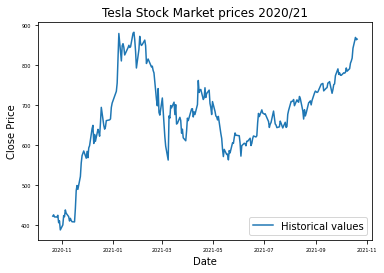

In [93]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

plt.plot(df["Date"], df["Close"], label="Historical values")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market prices 2020/21')
plt.legend()
plt.show()

What we want to make is a prediction algorithm that takes date as an input and predicts a Tesla stock market price from the given input. In order to acchieve this using a linear regression algorithm we need to first convert the date into an integer value (data we can use).

We can split the data into a training and a test set and fit the training data by applying the algorithm. What we are actually trying to implement is, of course, a stock prediction model. We could insert a random selection of all our training data, then it would only be a matter of finding a good algorithm managing to mimic the overall form of the figure and, given enough data, it could spit out the stock prices for a given date within the time frame very accurate. That is, however, a very useless model, seing as what we want is something to predict future prices.

In [94]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [95]:
Y = df["Close"].values
X = np.linspace(1, len(Y), len(Y))
days_future = 30
y = Y[:-days_future]
x = X[:-days_future]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [97]:
linear_regressor = LinearRegression()
X_test = X_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)

linear_regressor.fit(X_train,y_train)

x_future = X[len(x):].reshape(-1,1)
y_future = Y[len(x):]
y_pred = linear_regressor.predict(X_test)
Y_pred = linear_regressor.predict(x_future)

What does our linear regressor model look like?

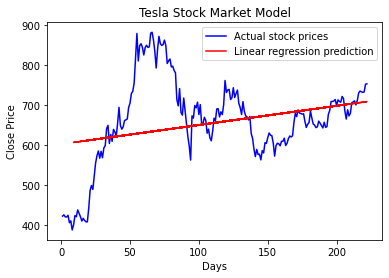

In [98]:
plt.plot(x,y, color='blue', label='Actual stock prices')
plt.plot(X_test, y_pred, color='red', label="Linear regression prediction")
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market Model')
plt.legend()
plt.show()

As well as can be expected for the unpredictable data. But it does show the overall trend.

We've fit the data with the linear regression model and can plot out predicted stock prices vs the actual stock market prices.

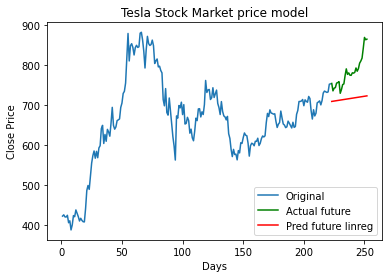

MSE = 5555.912003340444
Average error percentage = 9.517261986077456%


In [99]:
plt.plot(x,y, label='Original')
plt.plot(x_future, y_future, color='green', label='Actual future')
plt.plot(x_future, Y_pred, color='red', label='Pred future linreg')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market price model')
plt.legend()
plt.show()

mse = metrics.mean_squared_error(y_future,Y_pred)
mean_squared_y = (sum(y_future)/len(y_future))**2
print( "MSE = "+str(mse))
print("Average error percentage = "+str(np.sqrt(mse/mean_squared_y)*100)+ "%")

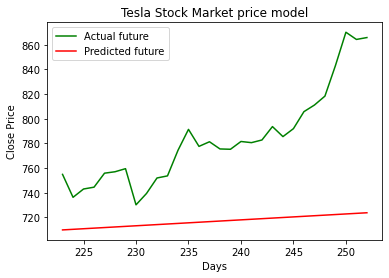

In [100]:
plt.plot(x_future, y_future, color='green', label='Actual future')
plt.plot(x_future, Y_pred, color='red', label='Predicted future')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market price model')
plt.legend()
plt.show()

In [101]:
models = []
models.append(linear_regressor)

As we can see, using a simple least squares method approach leads to a model that can predict the tendency of the data over time, but it leads to huge errors when the marked changes unpredictably.

We can clearly see that the curve of the stock price development for 2020 is not linear in nature, meaning a model designed for linear dependencies of the first degree is not that well suited. It can hardly be discribed by a function y=mx+c+e. However, after the second peak of the historical market prices, that is after the peak had reached it's lowest value, the prices started to increase more gradually again and a first degree linear regression based ML model will likely be more accurate. The same can be said for the time period before the first market fall.

We can first try implementing a linear regressor with polynomial features and see if we acchieve lower MSEs.

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [103]:
degree=4

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [104]:
y_pred = polyreg.predict(X_test)
Y_pred = polyreg.predict(x_future)

Now we can also check how the polynomial featured prediction behaves on the test set.

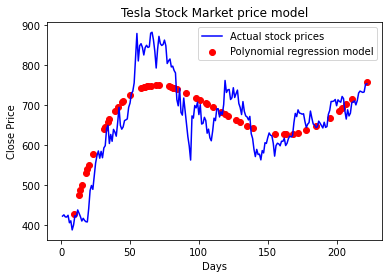

In [105]:
plt.plot(x,y, color = 'blue', label='Actual stock prices')
plt.scatter(X_test, y_pred, color='red', label='Polynomial regression model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market price model')
plt.legend()
plt.show()

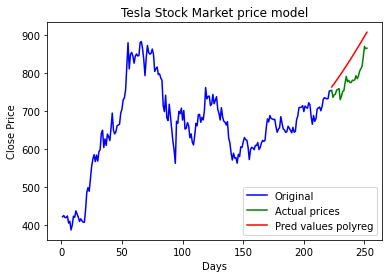

MSE = 2832.642615899366
Percentage score = 73.70593326991258%


In [106]:
plt.plot(x, y, color='blue', label='Original')
plt.plot(x_future, y_future, color='green', label='Actual prices')
plt.plot(x_future, Y_pred, color='red', label='Pred values polyreg')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market price model')
plt.legend()
plt.show()

mse = metrics.mean_squared_error(y_future,Y_pred)
score = polyreg.score(X_test,y_test)
print( "MSE = "+str(mse))
print("Percentage score = "+str(score*100)+ "%")

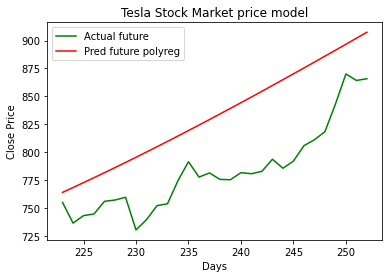

In [107]:
plt.plot(x_future, y_future, color='green', label='Actual future')
plt.plot(x_future, Y_pred, color='red', label='Pred future polyreg')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market price model')
plt.legend()
plt.show()

In [108]:
models.append(polyreg)

Adding polynomials improved our model somewhat, but not substantially.

 A better approximation for the immediate future stock prices might be found by excluding closing prices before the last major stock price fall. That would mean we would get a more accurate reading (closer line fit) for the last 70 or so days (e.g. the test data). But that does not mean it would be a great overall model. We can expect the steady market price increase to stop and reverse at some point (stock prices usually do), which the prediction accounts for, showing lower predictions than the actual data for the test set. Furthermore, the data set would be too small.

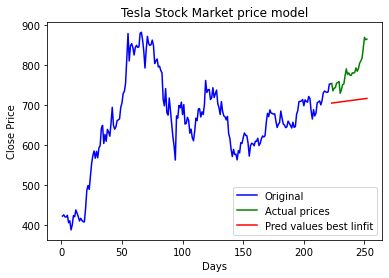

MSE = 6319.570840772007
Percentage score: 15.8138009740862%


In [109]:
linreg_model = 0
best_score = 0

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    linear_regressor = LinearRegression()
    X_test = X_test.reshape(-1,1)
    X_train = X_train.reshape(-1,1)

    linear_regressor.fit(X_train,y_train)
    score = linear_regressor.score(X_test, y_test)
    if score > best_score:
        linreg_model = linear_regressor
        best_score = score

Y_pred = linreg_model.predict(x_future)
plt.plot(x,y, color='blue', label='Original')
plt.plot(x_future, y_future, color='green', label='Actual prices')
plt.plot(x_future, Y_pred, color='red', label='Pred values best linfit')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market price model')
plt.legend()
plt.show()

mse = metrics.mean_squared_error(y_future,Y_pred)
mean_squared_y = (sum(y_future)/len(y_future))**2
print( "MSE = "+str(mse))
print("Percentage score: " + str(best_score*100) + "%")

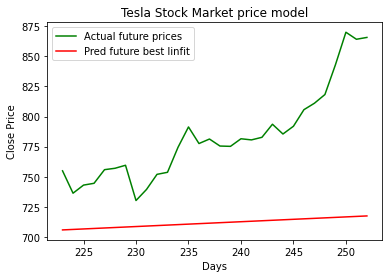

In [110]:
plt.plot(x_future, y_future, color='green', label='Actual future prices')
plt.plot(x_future, Y_pred, color='red', label='Pred future best linfit')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Market price model')
plt.legend()
plt.show()

In [111]:
models.append(linreg_model)

Further algorithm enhancements could potentially be found by including more features in the x-component of the linear fit (after scaling). We would, however, argue that the precision of the predictions are ultimately more influenced by how unpredictable the stock market actually is.

In [112]:
import pickle
filename = 'tesla_model.txt'
pickle.dump(models, open(filename, 'wb'))

In conclusion, stock price prediction is difficult.